<a href="https://colab.research.google.com/github/NightMachinary/soal_playground/blob/master/sk_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
from notebook.services.config import ConfigManager
c = ConfigManager()
c.update('notebook', {"CodeCell": {"cm_config": {"lineNumbers": False, "lineWrapping": True}}})


{'CodeCell': {'cm_config': {'lineNumbers': False, 'lineWrapping': True}}}

# bootstrap

In [ ]:
import numpy as np
import pandas
pd = pandas
from time import time, sleep
import concurrent
import gc

In [ ]:
! apt install -y unzip aria2 ncdu htop

Reading package lists... Done
Building dependency tree       
Reading state information... Done
htop is already the newest version (2.1.0-3).
aria2 is already the newest version (1.33.1-1).
ncdu is already the newest version (1.12-1).
unzip is already the newest version (6.0-21ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [29]:
!pip3 install -U scikit-learn fastai 
!pip3 install -U skorch
!pip install -U memory_profiler
# scikit-neuralnetwork

In [ ]:
%load_ext memory_profiler

# from memory_profiler import profile
#: did not work on IPython

import memory_profiler as mp

In [ ]:
from sklearn import datasets

In [ ]:
from fastai.torch_core import show_image, show_images

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import numpy as np

from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.model_selection import train_test_split
#: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#: https://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html

from sklearn.preprocessing import MinMaxScaler
#: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score

# digits dataset

In [ ]:
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
print(f"digits_x: {digits.data.shape}, digits_y: {digits.target.shape}")

digits_x: (1797, 64), digits_y: (1797,)


In [ ]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

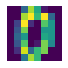

In [ ]:
show_image(digits.images[0])

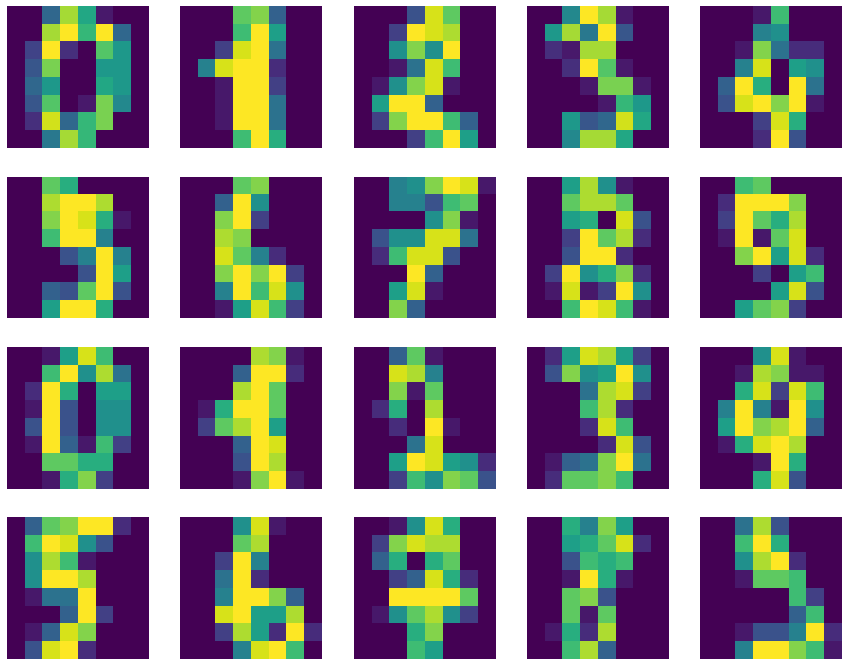

In [ ]:
show_images(digits.images, ncols=5, nrows=4)

## SVC

In [ ]:
##
# clf = SVC()
##
clf = KMeans(n_clusters=10, max_iter=10_000)
##

In [ ]:
##
# train_x = digits.data[0:1000]
# train_y = digits.target[0:1000]
# val_x = digits.data[1000:]
# val_y = digits.target[1000:]
##
train_x, val_x, train_y, val_y = \
train_test_split(digits.data, digits.target, test_size=0.25)

# normalize the data via scaling
t = MinMaxScaler()
t.fit(train_x)
train_x = t.transform(train_x)
val_x = t.transform(val_x)
##
train_x.shape

(1347, 64)

In [ ]:
clf.fit(train_x, train_y)

KMeans(max_iter=10000, n_clusters=10)

In [ ]:
preds = clf.predict(val_x)
preds

array([2, 7, 9, 8, 5, 7, 3, 1, 8, 3, 1, 8, 2, 8, 6, 8, 6, 8, 9, 3, 6, 1,
       6, 2, 2, 4, 9, 0, 9, 4, 2, 9, 2, 6, 8, 3, 7, 8, 4, 6, 3, 8, 6, 8,
       7, 8, 0, 8, 9, 1, 3, 5, 6, 6, 3, 8, 5, 4, 6, 0, 6, 5, 5, 3, 3, 0,
       7, 7, 8, 7, 6, 8, 2, 8, 3, 2, 6, 6, 7, 4, 8, 2, 5, 7, 1, 6, 5, 8,
       8, 9, 6, 4, 6, 0, 3, 2, 9, 6, 9, 1, 6, 5, 9, 8, 8, 0, 3, 6, 6, 5,
       9, 0, 0, 3, 2, 9, 2, 0, 2, 9, 8, 5, 0, 0, 8, 4, 2, 5, 9, 2, 2, 6,
       0, 7, 0, 0, 4, 2, 3, 3, 8, 1, 4, 6, 0, 1, 0, 9, 6, 6, 7, 5, 2, 8,
       5, 3, 2, 8, 4, 9, 9, 7, 5, 0, 8, 6, 2, 5, 7, 0, 1, 4, 0, 8, 2, 6,
       2, 3, 1, 5, 4, 9, 0, 2, 9, 1, 1, 2, 6, 6, 6, 9, 8, 8, 3, 7, 8, 3,
       2, 9, 9, 2, 3, 7, 3, 4, 7, 3, 5, 0, 9, 0, 3, 2, 2, 4, 4, 2, 8, 9,
       3, 4, 8, 0, 6, 6, 4, 9, 8, 3, 7, 4, 8, 1, 7, 0, 6, 3, 0, 3, 4, 8,
       7, 7, 0, 2, 0, 3, 4, 1, 8, 9, 4, 0, 1, 4, 9, 0, 4, 0, 9, 3, 4, 0,
       6, 1, 6, 5, 2, 4, 6, 1, 6, 6, 9, 4, 1, 4, 0, 4, 1, 4, 5, 6, 0, 8,
       4, 2, 4, 1, 9, 0, 8, 6, 3, 1, 1, 3, 8, 3, 8,

In [ ]:
val_y

array([7, 8, 6, 9, 4, 1, 3, 5, 9, 3, 5, 9, 7, 8, 2, 9, 2, 9, 6, 3, 2, 9,
       1, 7, 7, 0, 6, 7, 6, 0, 7, 6, 2, 2, 9, 2, 1, 8, 0, 2, 3, 8, 2, 8,
       1, 8, 8, 9, 6, 5, 3, 4, 2, 2, 3, 5, 4, 0, 2, 8, 2, 4, 4, 3, 3, 8,
       1, 9, 9, 1, 2, 9, 7, 8, 3, 7, 1, 2, 8, 0, 9, 7, 4, 8, 5, 1, 4, 3,
       9, 6, 2, 0, 2, 8, 3, 7, 6, 1, 1, 5, 2, 4, 6, 9, 8, 1, 3, 2, 2, 4,
       6, 1, 8, 3, 9, 6, 7, 8, 7, 6, 3, 4, 8, 8, 9, 0, 7, 4, 6, 7, 7, 2,
       1, 7, 8, 1, 0, 7, 3, 3, 9, 5, 0, 2, 8, 5, 8, 6, 2, 2, 1, 4, 7, 9,
       4, 3, 3, 9, 0, 6, 6, 8, 4, 1, 3, 2, 7, 4, 9, 8, 7, 0, 1, 5, 7, 2,
       9, 3, 5, 4, 0, 6, 3, 7, 6, 5, 5, 7, 2, 2, 2, 6, 8, 5, 3, 1, 8, 3,
       7, 6, 6, 7, 3, 4, 3, 0, 1, 3, 4, 8, 6, 8, 3, 7, 7, 0, 6, 7, 9, 6,
       3, 0, 9, 8, 2, 2, 0, 6, 9, 3, 9, 0, 9, 5, 1, 1, 2, 3, 2, 3, 0, 5,
       1, 1, 3, 7, 8, 3, 0, 5, 9, 6, 0, 8, 5, 0, 6, 8, 0, 1, 6, 3, 0, 1,
       2, 5, 2, 4, 7, 0, 2, 5, 2, 2, 6, 0, 5, 0, 3, 0, 5, 0, 4, 2, 2, 9,
       0, 7, 0, 5, 6, 8, 9, 8, 3, 5, 5, 3, 8, 3, 9,

In [ ]:
permu = {
    6: 1,
    9: 4,
    1: 0,
    5: 5,
    7: 3,
    2: 6,
    3: 9,
    4: 7,
    8: 8,
    0: 2,
}
preds_permuted = [permu[p] for p in preds]
sum(preds_permuted == val_y)/len(preds)

0.051111111111111114

In [ ]:
metrics.completeness_score(val_y, preds)

0.7657406505019037

In [ ]:
metrics.homogeneity_score(val_y, preds)

0.7603351771923036

In [ ]:
sum(preds == val_y)/len(preds)

0.12444444444444444

# reddit_sample

## loading the data

In [ ]:
!aria2c --allow-overwrite=true 'https://archive.ics.uci.edu/ml/machine-learning-databases/00441/repeat_consumption_data.zip'
!yes | unzip repeat_consumption_data.zip


01/17 13:52:18 [NOTICE] Downloading 1 item(s)

01/17 13:52:23 [NOTICE] Download complete: /content/repeat_consumption_data.zip

Download Results:
gid   |stat|avg speed  |path/URI
======+====+===========+=======================================================
1ae100|OK  |    14MiB/s|/content/repeat_consumption_data.zip

Status Legend:
(OK):download completed.
Archive:  repeat_consumption_data.zip
replace data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: data/.DS_Store          
replace __MACOSX/data/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: __MACOSX/data/._.DS_Store  
replace data/lastfm/validation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: data/lastfm/validation.csv  
replace data/lastfm/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: data/lastfm/test.csv    
replace __MACOSX/data/lastfm/._test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: __MACOSX/data/lastfm/._test.csv  
replace data/lastfm/train.csv? [y]es, 

In [ ]:
train_path = "/content/data/reddit_sample/train.csv"

In [ ]:
def train_load():
  train_raw = pd.read_csv(train_path, names=['x','y','z'])
  display(train_raw)

  #: @todo1 use sparse matrices
  train_mat = train_raw.pivot(index="x", columns="y", values="z")
  # display(train_mat.loc[0,741])
  display(train_mat)


  train_np = train_mat.to_numpy(na_value=0.)
  return train_np #, train_mat

train_np = train_load()
display(train_np)
gc.collect()


,x,y,z
0,0,741,1
1,0,877,189
2,0,5773,1
3,0,6492,3
4,0,7083,2
...,...,...,...
379545,20023,17045,1
379546,20023,18347,2
379547,20023,21204,2
379548,20023,21342,1


y,1,3,4,5,6,8,9,13,14,15,16,17,20,22,23,25,29,31,33,35,36,37,39,41,43,44,46,47,48,49,50,51,52,56,58,59,63,64,65,66,...,21331,21333,21334,21335,21338,21340,21341,21342,21344,21345,21346,21347,21349,21351,21352,21353,21354,21355,21356,21358,21359,21360,21361,21362,21363,21365,21367,21368,21371,21372,21373,21374,21375,21376,21377,21378,21381,21382,21383,21385
x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

0

In [ ]:
train_np.shape

(20024, 13456)

In [ ]:
train_np[0][[train_np[0] != 0]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([  1., 189.,   1.,   3.,   2.,  22.,   2.,   5.,   4.,   8.,   1.,
         3.,   1.,   2.,   1.,  10.,   1.,   3.])

## benchmarking tools

In [ ]:
def benchmark_one(proc, *, name, interval=1):
  mp_kwargs = { 
    "max_usage": True, 
    "retval": True,
    # "timeout": timeout, #: after reading its source code, this basically only manipulates the number of iterations
    "max_iterations": 1,
    # "multiprocess": True, #: useless for functions
    # "include_children": True, 
    #: @upstreamBug? This double counts (well, probably a copy-on-write fork causes this) memory when measuring functions, but not when measuring the starting memory
    "include_children": False,
    "interval": interval  
  }
  start_mem = mp.memory_usage(**mp_kwargs)
  start_time = time()
  res = mp.memory_usage(proc, **mp_kwargs)
  end_time = time()
  dur = end_time - start_time
  ret_val = res[1]
  max_mem = res[0] #: I don't know why this is not returning the number of samples per its doc.
  used_mem = max_mem - start_mem

  print(f"{name}: dur={dur}, used_mem={used_mem}, max_mem={max_mem}")
  # print(f"res={repr(res)}")

  return ret_val, dur, used_mem

def benchmark_n(n, *args, **kwargs):
  "Even with forking, the amount of memory used is dependent on the state of the process before the fork; e.g., the more memory it has claimed from the OS and then subsequently freed but not released back, can decrease its further OS memory usage."
  
  fork_p = True

  durs = np.empty(n) #: filled with nans
  used_mems = np.empty(n)
  losses = np.empty(n)
  ret_val = None #: needed for correct scoping
  for i in range(n):
    if fork_p == True:
      with concurrent.futures.ProcessPoolExecutor(max_workers=1) as executor:
        res = executor.submit(benchmark_one, *args, **kwargs).result()
    else:
      res = benchmark_one(*args, **kwargs)
    
    ret_val, dur, used_mem = res
    
    loss = ret_val['loss']
    losses[i] = loss
    durs[i] = dur
    used_mems[i] = used_mem
    if 1 != (n-1):
      ret_val = None #: might help GC

  return (ret_val, durs, used_mems, losses)

In [ ]:
def dummy():
  gc.collect()
  sleep(1)
  a = np.zeros(100_000_000)
  sleep(1.1)
  return {'loss': 0}

def nop():
  return None

benchmark_n(3, 
              (dummy, []), 
              name="dummy",)

dummy: dur=3.5496842861175537, used_mem=513.10546875, max_mem=5593.1328125
dummy: dur=3.565230131149292, used_mem=513.30859375, max_mem=5593.2109375
dummy: dur=3.537529945373535, used_mem=513.16015625, max_mem=5593.1875


(None,
 array([3.54968429, 3.56523013, 3.53752995]),
 array([513.10546875, 513.30859375, 513.16015625]),
 array([0., 0., 0.]))

### tmp

In [37]:
from resource import getrusage, RUSAGE_SELF
getrusage(RUSAGE_SELF)

resource.struct_rusage(ru_utime=27.085694, ru_stime=29.27901, ru_maxrss=14173152, ru_ixrss=0, ru_idrss=0, ru_isrss=0, ru_minflt=3447033, ru_majflt=12, ru_nswap=0, ru_inblock=2928, ru_oublock=24, ru_msgsnd=0, ru_msgrcv=0, ru_nsignals=0, ru_nvcsw=123288, ru_nivcsw=11229)

## k-means

In [36]:
def kmeans_sklearn_n10_iter10(input_data):
  clf = KMeans(n_clusters=10, max_iter=10)
  clf.fit(input_data)
  return {'loss': clf.inertia_}

def kmeans_sklearn_n10_iter10_withdata():
  return kmeans_sklearn_n10_iter10(train_np)

ret_val, durs, used_mems, losses = \
  (benchmark_n(3, 
              (kmeans_sklearn_n10_iter10_withdata, []), 
              # ((lambda: kmeans_sklearn_n10_iter10(train_np)), []), 
              # (kmeans_sklearn_n10_iter10, [train_np]), 
              name="kmeans_sklearn_n10_iter10",))

kmeans_sklearn_n10_iter10: dur=63.25836634635925, used_mem=10.25390625, max_mem=13066.75390625
kmeans_sklearn_n10_iter10: dur=63.773088693618774, used_mem=10.31640625, max_mem=13066.75390625
kmeans_sklearn_n10_iter10: dur=62.86378312110901, used_mem=10.31640625, max_mem=13066.75390625


### interactive

In [ ]:
train_pred = clf.predict(train_np)
train_pred

array([ 0, 68, 68, ..., 68, 68, 68], dtype=int32)

In [ ]:
train_pred_pd = pd.Series(train_pred)
train_pred_pd

0         0
1        68
2        68
3        68
4        68
         ..
20019    68
20020    68
20021    68
20022    68
20023    68
Length: 20024, dtype: int32

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
  print(train_pred_pd.value_counts())

68    18435
0       905
75      149
16       80
61       73
82       45
19       38
21       35
88       23
20       17
27       16
58       16
35       10
25       10
84        9
43        9
22        8
86        7
79        6
89        6
49        5
66        5
67        4
81        4
76        4
57        4
7         4
40        3
87        3
33        3
2         3
13        3
28        3
92        3
6         2
90        2
65        2
72        2
10        2
44        2
73        2
38        2
80        2
3         2
36        1
5         1
4         1
52        1
32        1
1         1
99        1
83        1
51        1
17        1
48        1
37        1
64        1
50        1
34        1
18        1
97        1
96        1
98        1
95        1
53        1
69        1
60        1
29        1
45        1
77        1
93        1
14        1
30        1
46        1
62        1
78        1
94        1
15        1
31        1
47        1
63        1
12        1
91        1
59  